In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
# fro later graphiing
# %pip install pydot
# %pip install graphviz
import pydot
import graphviz

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10)
])

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='Adam',
             loss=loss_fn,
             metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 1s 470us/step - loss: 0.6003 - accuracy: 0.79800s - loss: 0.705
Epoch 2/2
1875/1875 [==============================] - 1s 470us/step - loss: 0.4612 - accuracy: 0.8429


In [8]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.4740 - accuracy: 0.8359


[0.47398272156715393, 0.8359000086784363]

In [9]:
import copy
def relu(arr):
    cp_arr = copy.copy(arr)
    for i in range(len(cp_arr)):
        if cp_arr[i] < 0:
            cp_arr[i] = 0
    return cp_arr

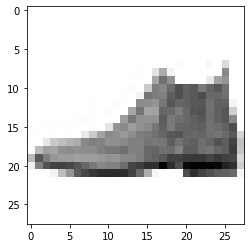

In [10]:
plt.imshow(x_test[0], cmap=plt.cm.binary)

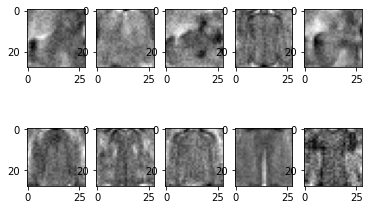

In [11]:
node_weights = model.layers[1].weights[0].numpy()
node_weights = np.rot90(node_weights)

fig, axs = plt.subplots(2, 5) #2*5 = 10 plots
row = -1
for i in range(node_weights.shape[0]):
    if i%5 == 0:
        row += 1
    axs[row][i%5].imshow(node_weights[i].reshape(28,28),\
                        cmap=plt.cm.binary)

-6.548084545782059


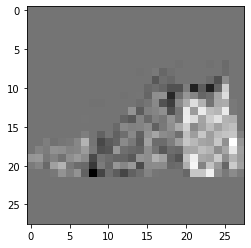

In [12]:
pixels = x_test[0].flatten()
pixels = pixels * node_weights[9]
plt.imshow(pixels.reshape(28,28), cmap=plt.cm.binary)
print(sum(pixels))

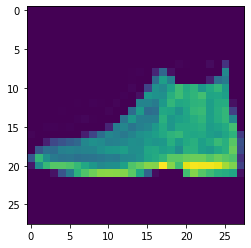

In [13]:
plt.imshow(x_test[0])

-6.548084545782059


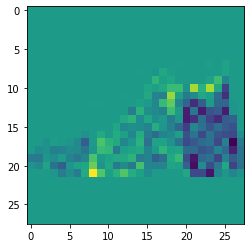

In [14]:
pixels = x_test[0].flatten()
pixels = pixels * node_weights[9]
plt.imshow(pixels.reshape(28,28))
print(sum(pixels))

2.215978919896273


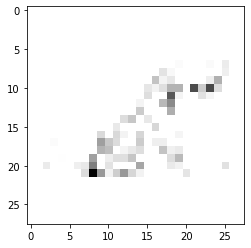

In [15]:
pixels = x_test[0].flatten()
pixels = pixels * node_weights[9]

rel_pixels = relu(pixels)
plt.imshow(rel_pixels.reshape(28,28), cmap=plt.cm.binary)
print(sum(rel_pixels))

2.215978919896273


0.0

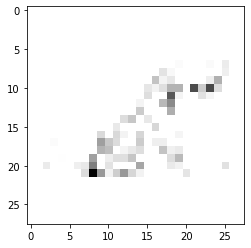

In [16]:
pixels = x_test[0].flatten()
pixels = pixels * node_weights[9]

rel_pixels = relu(pixels)
plt.imshow(rel_pixels.reshape(28,28), cmap=plt.cm.binary)
print(sum(rel_pixels))

adjusted = rel_pixels - 3.57
sum(relu(adjusted))

In [17]:
predictions = model(x_test[:1])
print(predictions)
predictions = predictions.numpy()[0]
print(predictions)
max_pred = np.amax(predictions)
print(y_test[0],np.where(predictions == max_pred)[0])

tf.Tensor(
[[-6.424263   -7.203983   -4.1628942  -4.8533926  -4.188326    3.5551112
  -3.775476    3.7702768   0.48338404  5.359645  ]], shape=(1, 10), dtype=float32)
[-6.424263   -7.203983   -4.1628942  -4.8533926  -4.188326    3.5551112
 -3.775476    3.7702768   0.48338404  5.359645  ]
9 [9]


In [18]:
print(model.layers)
print(model.layers[1].bias) #layer 0 was flatten layer,
print(model.layers[1].weights) #only need weight and bias from layer 1


[<tensorflow.python.keras.layers.core.Flatten object at 0x000001D8EC6999C8>, <tensorflow.python.keras.layers.core.Dense object at 0x000001D8EF62D808>]
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.12382241, -0.289873  , -0.08305582,  0.1183889 , -0.44035706,
        1.0709162 ,  0.24102925, -0.12488606, -0.37646958, -0.6989901 ],
      dtype=float32)>
[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
array([[-1.29937246e-01, -1.35054782e-01, -8.28309357e-02, ...,
        -7.98604358e-03, -5.25631569e-02, -6.39595315e-02],
       [ 1.07004300e-01, -1.06013253e-01, -8.38980079e-03, ...,
        -8.85466561e-02, -7.33104348e-02,  2.16413944e-04],
       [ 6.36680871e-02, -2.39143565e-01,  6.86058104e-02, ...,
        -1.90788868e-03, -1.23692259e-01, -5.71675189e-02],
       ...,
       [-1.19632035e-01, -9.34203714e-02,  1.09255910e-01, ...,
         8.65629502e-03, -3.05319279e-01,  5.28828092e-02],
       [-1.73207909e-01, -1.02121294e-01,  

### test_idx = 0

In [19]:
test_idx = 0 #choose an index of test data to test
vals= x_test[test_idx].flatten() #ID array of 784 pixel values

In [20]:
#interested in the weightss, one from the input layer (784 10)
weights = model.layers[1].weights[0].numpy()

print(vals.shape)
#each pixel has 10 weights, one for each node it goes through
print(weights.shape)
#I need the rows to be the 10 nodes and columns the 784 pixels
weights = np.rot90(weights)
print(weights.shape)
#I also need the bias for the layer whose weight I am taking)
bias = model.layers[1].bias

(784,)
(784, 10)
(10, 784)


In [21]:
#array to holdfinal 10 output weighted sums
node_outputs = []
#for each node in the 10 nodes
for i in range(weights.shape[0]):
    node_sum = 0 #perform weighted sumon all pixels
    #over each pixel in th einput
    for j in range(len(vals)):
        curr_pixel = vals[j]
        curr_w = weights[i][j]
        #perfomr weighted sum
        node_sum += curr_w * curr_pixel
    #add the node's bias
    node_sum += bias[i]
    #add this node's output to the list of outputs
    node_outputs.append(node_sum)
    
node_outputs = np.array(node_outputs)
#Because I rotated weights 90 degrees,
#   I get my answers backward and must flip them.
node_outputs = np.flip(node_outputs)

In [22]:
print(node_outputs)
max_pred = np.amax(node_outputs)
print(y_test[test_idx], np.where(node_outputs == max_pred)[0])

[-7.247075  -7.290578  -4.204725  -4.7307525 -2.6770527  2.0438378
 -3.8981164  3.812107   0.5699806  6.182457 ]
9 [9]


### test_idx = 30

In [23]:
test_idx = 30 #choose an index of test data to test
vals= x_test[test_idx].flatten() #ID array of 784 pixel values

In [24]:
#interested in the weightss, one from the input layer (784 10)
weights = model.layers[1].weights[0].numpy()

print(vals.shape)
#each pixel has 10 weights, one for each node it goes through
print(weights.shape)
#I need the rows to be the 10 nodes and columns the 784 pixels
weights = np.rot90(weights)
print(weights.shape)
#I also need the bias for the layer whose weight I am taking)
bias = model.layers[1].bias

(784,)
(784, 10)
(10, 784)


In [25]:
#array to holdfinal 10 output weighted sums
node_outputs = []
#for each node in the 10 nodes
for i in range(weights.shape[0]):
    node_sum = 0 #perform weighted sumon all pixels
    #over each pixel in th einput
    for j in range(len(vals)):
        curr_pixel = vals[j]
        curr_w = weights[i][j]
        #perfomr weighted sum
        node_sum += curr_w * curr_pixel
    #add the node's bias
    node_sum += bias[i]
    #add this node's output to the list of outputs
    node_outputs.append(node_sum)
    
node_outputs = np.array(node_outputs)
#Because I rotated weights 90 degrees,

In [26]:
print(node_outputs)
max_pred = np.amax(node_outputs)
print(y_test[test_idx], np.where(node_outputs == max_pred)[0])

[ -9.296685    4.0043583 -10.832933   -4.5456104  -4.286536   -5.929482
  -7.067256   -5.6961093 -12.423065  -13.162255 ]
8 [1]


### x_test = 1000

In [27]:
test_idx = 1000 #choose an index of test data to test
vals= x_test[test_idx].flatten() #ID array of 784 pixel values

In [28]:
#interested in the weightss, one from the input layer (784 10)
weights = model.layers[1].weights[0].numpy()

print(vals.shape)
#each pixel has 10 weights, one for each node it goes through
print(weights.shape)
#I need the rows to be the 10 nodes and columns the 784 pixels
weights = np.rot90(weights)
print(weights.shape)
#I also need the bias for the layer whose weight I am taking)
bias = model.layers[1].bias

(784,)
(784, 10)
(10, 784)


In [29]:
node_outputs = []
#for each node in the 10 nodes
for i in range(weights.shape[0]):
    node_sum = 0 #perform weighted sumon all pixels
    #over each pixel in th einput
    for j in range(len(vals)):
        curr_pixel = vals[j]
        curr_w = weights[i][j]
        #perfomr weighted sum
        node_sum += curr_w * curr_pixel
    #add the node's bias
    node_sum += bias[i]
    #add this node's output to the list of outputs
    node_outputs.append(node_sum)
    
node_outputs = np.array(node_outputs)
#Because I rotated weights 90 degrees,

In [30]:
print(node_outputs)
max_pred = np.amax(node_outputs)
print(y_test[test_idx], np.where(node_outputs == max_pred)[0])

[-16.209276   -3.6692033 -23.357073    0.7018753 -21.260124   -6.4373326
  -5.8923564  -1.593781   -7.3174667   1.3566227]
0 [9]


### x_test = 9999

In [31]:
test_idx = 1000 #choose an index of test data to test
vals= x_test[test_idx].flatten() #ID array of 784 pixel values

In [32]:
#interested in the weightss, one from the input layer (784 10)
weights = model.layers[1].weights[0].numpy()

print(vals.shape)
#each pixel has 10 weights, one for each node it goes through
print(weights.shape)
#I need the rows to be the 10 nodes and columns the 784 pixels
weights = np.rot90(weights)
print(weights.shape)
#I also need the bias for the layer whose weight I am taking)
bias = model.layers[1].bias

(784,)
(784, 10)
(10, 784)


In [33]:
node_outputs = []
#for each node in the 10 nodes
for i in range(weights.shape[0]):
    node_sum = 0 #perform weighted sumon all pixels
    #over each pixel in th einput
    for j in range(len(vals)):
        curr_pixel = vals[j]
        curr_w = weights[i][j]
        #perfomr weighted sum
        node_sum += curr_w * curr_pixel
    #add the node's bias
    node_sum += bias[i]
    #add this node's output to the list of outputs
    node_outputs.append(node_sum)
    
node_outputs = np.array(node_outputs)
#Because I rotated weights 90 degrees,

In [34]:
print(node_outputs)
max_pred = np.amax(node_outputs)
print(y_test[test_idx], np.where(node_outputs == max_pred)[0])

[-16.209276   -3.6692033 -23.357073    0.7018753 -21.260124   -6.4373326
  -5.8923564  -1.593781   -7.3174667   1.3566227]
0 [9]


### Plotting the Network Hierarchy

In [35]:

tf.keras.utils.plot_model(model, to_file='model_plot.png',\
                         show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
